# IBCSO v2 surface and bed elevation
**Description:** International Bathymetric Chart of the Southern Ocean Version 2 gridded data. 

**Dataset:** 

Dorschel, Boris, Laura Hehemann, Sacha Viquerat, Fynn Warnke, Simon Dreutter, Yvonne Schulze Tenberge, Daniela Accettella, et al. “The International Bathymetric Chart of the Southern Ocean Version 2 (IBCSO V2).” PANGAEA, 2022. https://doi.org/10.1594/PANGAEA.937574.


**Associated paper:** 

Dorschel, Boris, Laura Hehemann, Sacha Viquerat, Fynn Warnke, Simon Dreutter, Yvonne Schulze Tenberge, Daniela Accettella, et al. “The International Bathymetric Chart of the Southern Ocean Version 2.” Scientific Data 9, no. 1 (December 2022): 275. https://doi.org/10.1038/s41597-022-01366-7.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, utils

In [2]:
layer_names = ["surface", "bed"]

grids = []
for name in layer_names:
    data = fetch.ibcso(
        layer=name,
        # available options
        # region,
        # spacing,
        # registration ("g" for gridline or "p" for pixel),
    )
    grids.append(data)

In [3]:
_ = utils.get_grid_info(data, print_info=True)

grid spacing: 500.0 m
grid region: (-2800000.0, 2800000.0, -2800000.0, 2800000.0)
grid zmin: -6321.07080078
grid zmax: 4723.67041016
grid registration: p


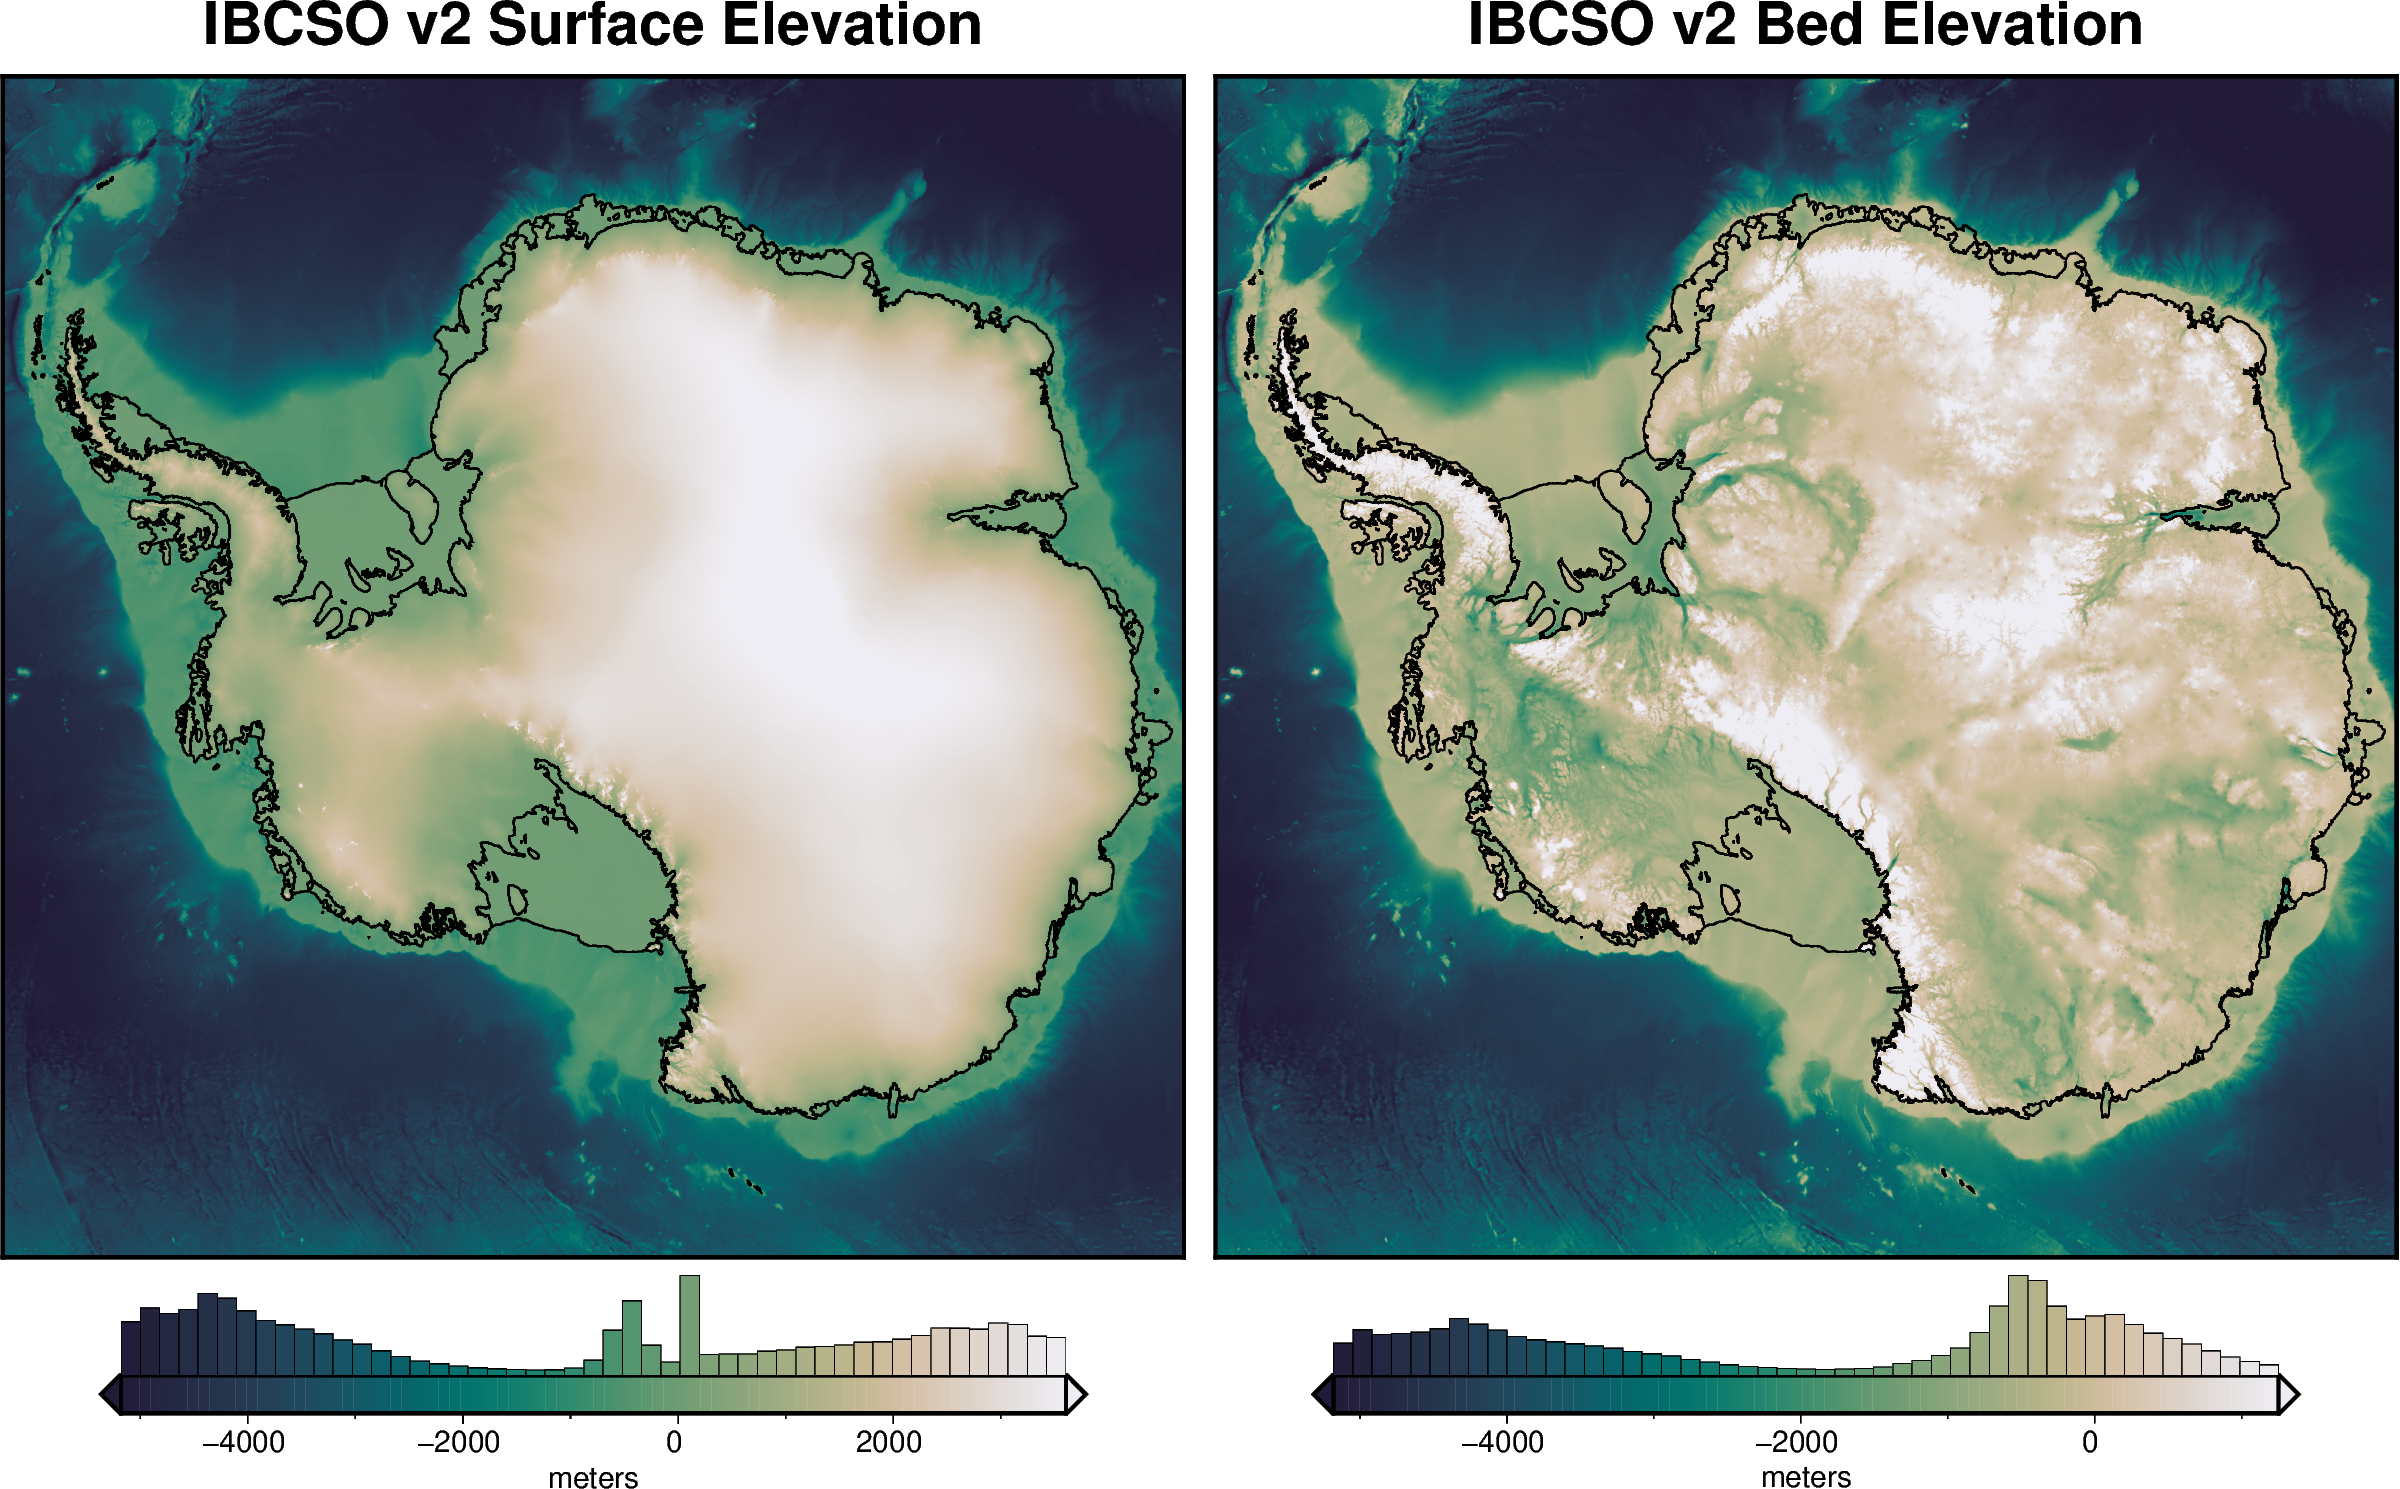

In [4]:
fig = maps.plot_grd(
    grids[0],
    title="IBCSO v2 Surface Elevation",
    coast=True,
    cbar_label="meters",
    hist=True,
    robust=True,
    cmap="rain",
    reverse_cpt=True,
    hemisphere="south",
)
fig = maps.plot_grd(
    grids[1],
    fig=fig,
    origin_shift="x",
    title="IBCSO v2 Bed Elevation",
    coast=True,
    cbar_label="meters",
    hist=True,
    robust=True,
    cmap="rain",
    reverse_cpt=True,
    hemisphere="south",
)
fig.show(dpi=200)